In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,learning_curve, RandomizedSearchCV


In [433]:
df = pd.read_csv("brief_assurance.csv")

In [434]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [435]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges"],axis=1)
y = df[target]



In [436]:
numerical_features = [
       'age','bmi'
       ]
categorical_features = [
       'sex' , 'smoker', 'region','children'
       ]



In [437]:


my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    ("pol",PolynomialFeatures(),numerical_features),
    ("one_hot_encoder",OneHotEncoder(),categorical_features)
])



In [438]:


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)



In [439]:
modelLasso= make_pipeline(my_col_trans, Lasso(alpha=100,random_state=0))
modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)


0.7407070581849036

In [440]:
modelLasso.score(X_test,y_test)

0.7967695414066837

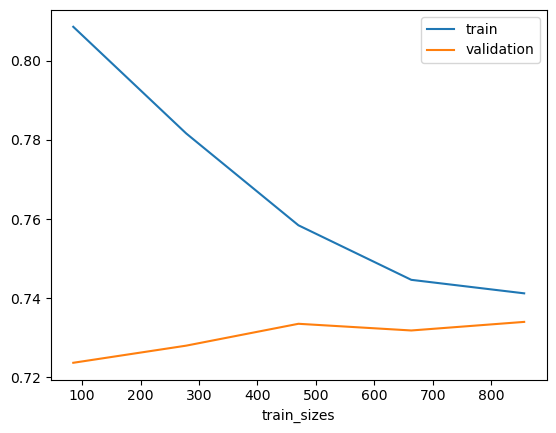

In [441]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelLasso,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [442]:
y_pred = modelLasso.predict(X_train)

In [443]:
residual = (y_pred - y_train).abs().sort_values()

In [444]:
residual.describe()

count     1070.000000
mean      4322.743680
std       4301.745272
min          2.011028
25%       1412.061272
50%       2875.492966
75%       6703.857690
max      30585.859995
Name: charges, dtype: float64

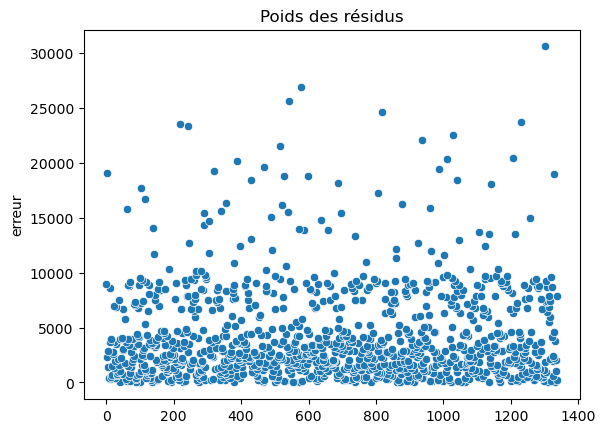

In [445]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [446]:


residual.quantile(0.98)



18343.242738044282

In [447]:
to_drop = residual[residual > residual.quantile(0.98)].index

In [448]:


X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)



In [449]:


modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)



0.7894847063276033

In [450]:


modelLasso.score(X_test,y_test)



0.7927378661219814

In [451]:
y_pred = modelLasso.predict(X_train)

In [452]:
residual = (y_pred - y_train).abs().sort_values()

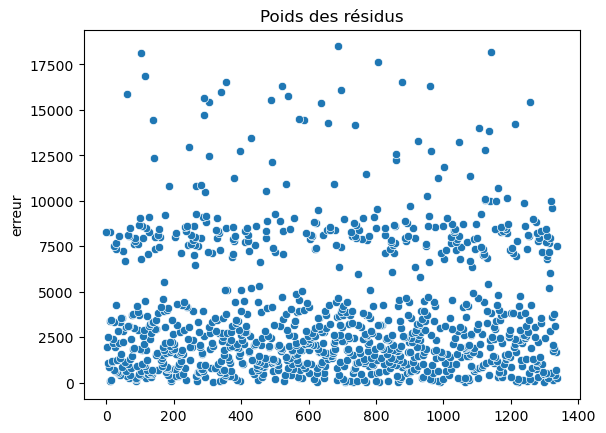

In [453]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

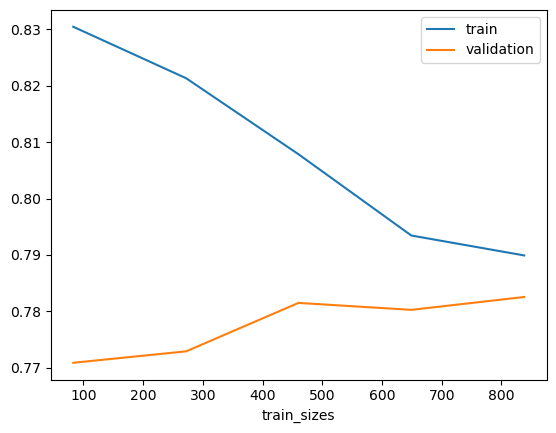

In [454]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelLasso,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()